Load The DataSet

In [50]:
import pandas as pd
data = pd.read_csv('E:/Sem-3/Nueral Network and Deep ML/ml-with-python-course-project/train.csv')

In [51]:
# Displaying the top 5 rows of the DataSet
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [52]:
# displaying the last 5 rows of the DataSet
data.tail()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
210,211,0,80.6,Others,82.0,Others,Commerce,77.6,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,0,58.0,Others,60.0,Others,Science,72.0,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,0,67.0,Others,67.0,Others,Commerce,73.0,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,1,74.0,Others,66.0,Others,Commerce,58.0,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0
214,215,0,62.0,Central,58.0,Others,Science,53.0,Comm&Mgmt,No,89.0,Mkt&HR,60.22,Not Placed,NaN


Data Preprocessing

In [53]:
# getting the shape of the DataSet like number of rows and columns
data.shape
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 215
Number of Columns 15


In [54]:
# Getting the information of the Dataset like Data type of each column and number of the non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    int64  
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(2), object(7)
memory usage: 25.3+ KB


In [55]:
# Summary statistics for numerical features
print("\nSummary statistics for numerical features:")
data.describe()


Summary statistics for numerical features:


,sl_no,gender,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,0.353488,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,0.479168,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,0.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,0.000000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,0.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,1.000000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,1.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [56]:

# Check for missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())


Missing values in the dataset:
sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64


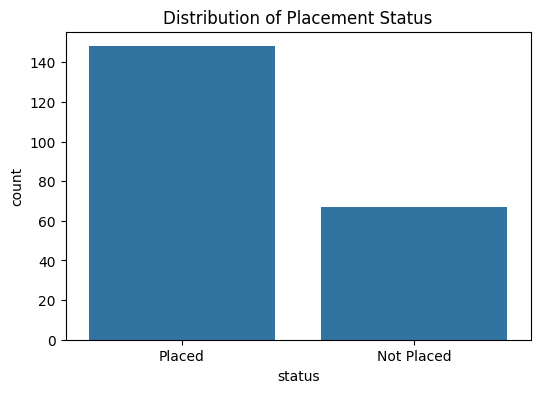

In [57]:
# Distribution of the target variable (status)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='status', data=data)
plt.title("Distribution of Placement Status")
plt.show()

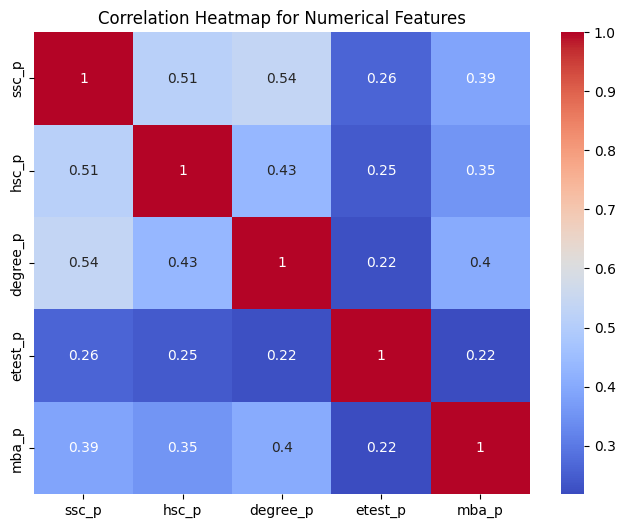

In [58]:
# Correlation heatmap for numerical features
plt.figure(figsize=(8, 6))
sns.heatmap(data[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap for Numerical Features")
plt.show()


In [59]:
# Drop the 'salary' and 'sl_no' columns as these two are not needed for modeling

data = data.drop(['sl_no','salary'],axis=1)

In [60]:
data.head(1)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.0,Others,91.0,Others,Commerce,58.0,Sci&Tech,No,55.0,Mkt&HR,58.8,Placed


Encoding the Categorical Columns

In [61]:
# encodeing for 'ssc_b' Column 

data['ssc_b'].unique()

array(['Others', 'Central'], dtype=object)

In [62]:
# 1 >>>> Central 
# 0 >>>> Others

data['ssc_b'] = data['ssc_b'].map({'Central':1,'Others':0})

In [63]:
# Encoding for 'hsb_b' column 
data['hsc_b'].unique()

array(['Others', 'Central'], dtype=object)

In [64]:
# 1 >>>> Central 
# 0 >>>> Others

data['hsc_b'] = data['hsc_b'].map({'Central':1,'Others':0})

In [65]:
# Encoding for 'degree_t' Column 
data['degree_t'].unique()

array(['Sci&Tech', 'Comm&Mgmt', 'Others'], dtype=object)

In [66]:
# Sci&Tech >>>> 2 
# Comm&Mgmt >>>> 1 
# Others >>>> 0 


data['degree_t'] = data['degree_t'].map({'Sci&Tech':2,'Comm&Mgmt':1,'Others':0})

In [67]:
# Encoding for specialisation Column 
data['specialisation'].unique()

array(['Mkt&HR', 'Mkt&Fin'], dtype=object)

In [68]:
# MKt&HR >>>> 1 
# MKt&Fin >>>> 0 

data['specialisation'] =data['specialisation'].map({'Mkt&HR':1,'Mkt&Fin':0})

In [69]:
# Encoding for Workex Column 
data['workex'].unique()

# Yes >>>> 1 
# No >>>> 0 
data['workex'] = data['workex'].map({'Yes':1,'No':0})

In [70]:
# Encoding for status Column 
data['status'].unique()

array(['Placed', 'Not Placed'], dtype=object)

In [71]:
# placed >>>> 1 
# Not Placed >>>> 0 

data['status'] = data['status'].map({'Placed':1,'Not Placed':0})

In [72]:
# Encoding for hsc_s column 
data['hsc_s'].unique()

array(['Commerce', 'Science', 'Arts'], dtype=object)

In [73]:
# Science >>>> 2 
# commerce >>>> 1 
# Arts >>>> 0 

data['hsc_s'] = data['hsc_s'].map({'Science':2,'Commerce':1,'Arts':0})

In [74]:
# Displaying the top 5 rows of the DataSet after encoding and droping the columns
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.00,0,91.00,0,1,58.00,2,0,55.0,1,58.80,1
1,0,79.33,1,78.33,0,2,77.48,2,1,86.5,0,66.28,1
2,0,65.00,1,68.00,1,0,64.00,1,0,75.0,0,57.80,1
3,0,56.00,1,52.00,1,2,52.00,2,0,66.0,1,59.43,0
4,0,85.80,1,73.60,1,1,73.30,1,0,96.8,0,55.50,1


Split Data into Training and Test Sets 

In [75]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = data.drop('status', axis=1)
y = data['status']

# Split into training and test sets (70% training, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shape of the training and test sets
print("Shape of training set (X_train, y_train):", X_train.shape, y_train.shape)
print("Shape of test set (X_test, y_test):", X_test.shape, y_test.shape)

Shape of training set (X_train, y_train): (150, 12) (150,)
Shape of test set (X_test, y_test): (65, 12) (65,)


Model Selection

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Initialize models
log_reg = LogisticRegression(random_state=42)
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)

# List of models for easy iteration
models = {
    "Logistic Regression": log_reg,
    "Random Forest": rf,
    "XGBoost": xgb
}

Hyperparameter Tuning 

In [77]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Logistic Regression
param_grid_log_reg = {'C': [0.01, 0.1, 1, 10]}
grid_log_reg = GridSearchCV(log_reg, param_grid_log_reg, cv=5, scoring='accuracy')
grid_log_reg.fit(X_train, y_train)

# Hyperparameter tuning for Random Forest
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

# Hyperparameter tuning for XGBoost
param_grid_xgb = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}
grid_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='accuracy')
grid_xgb.fit(X_train, y_train)

# Best hyperparameters
print("Best hyperparameters for Logistic Regression:", grid_log_reg.best_params_)
print("Best hyperparameters for Random Forest:", grid_rf.best_params_)
print("Best hyperparameters for XGBoost:", grid_xgb.best_params_)

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

Best hyperparameters for Logistic Regression: {'C': 1}
Best hyperparameters for Random Forest: {'max_depth': None, 'n_estimators': 50}
Best hyperparameters for XGBoost: {'learning_rate': 0.1, 'n_estimators': 200}


In [78]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

# Evaluate each model
results = {}
for name, model in models.items():
    if name == "Logistic Regression":
        model = grid_log_reg.best_estimator_
    elif name == "Random Forest":
        model = grid_rf.best_estimator_
    elif name == "XGBoost":
        model = grid_xgb.best_estimator_
    
    accuracy, precision, recall, f1 = evaluate_model(model, X_test, y_test)
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    }

# Display results
for model_name, metrics in results.items():
    print(f"\n{model_name} Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")


Logistic Regression Metrics:
Accuracy: 0.8462
Precision: 0.8696
Recall: 0.9091
F1-Score: 0.8889

Random Forest Metrics:
Accuracy: 0.8000
Precision: 0.8039
Recall: 0.9318
F1-Score: 0.8632

XGBoost Metrics:
Accuracy: 0.8000
Precision: 0.8039
Recall: 0.9318
F1-Score: 0.8632


Confusion Matrix

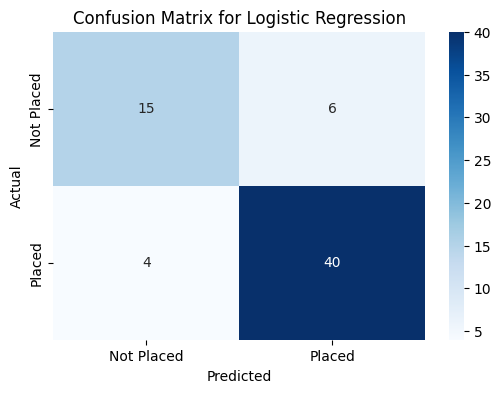

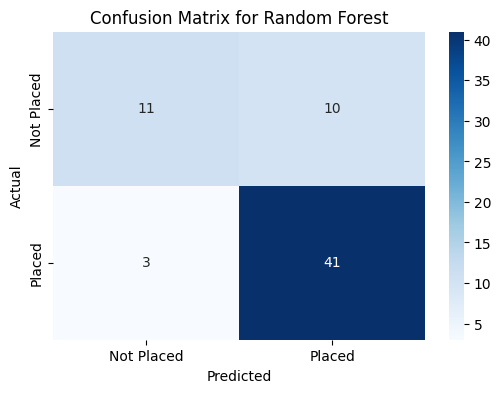

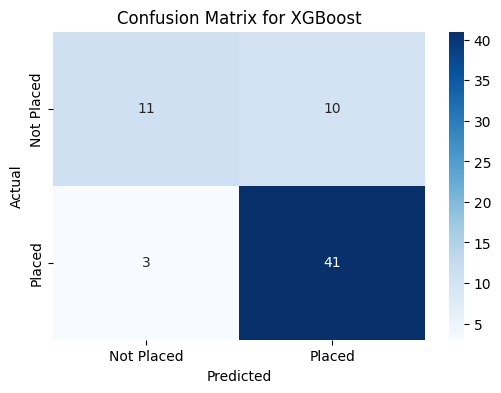

In [79]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Plot confusion matrices for each model
for name, model in models.items():
    if name == "Logistic Regression":
        model = grid_log_reg.best_estimator_
    elif name == "Random Forest":
        model = grid_rf.best_estimator_
    elif name == "XGBoost":
        model = grid_xgb.best_estimator_
    
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Placed', 'Placed'], yticklabels=['Not Placed', 'Placed'])
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

Compare Model Performance


Model Performance Comparison:
                     Accuracy  Precision    Recall  F1-Score
Logistic Regression  0.846154   0.869565  0.909091  0.888889
Random Forest        0.800000   0.803922  0.931818  0.863158
XGBoost              0.800000   0.803922  0.931818  0.863158


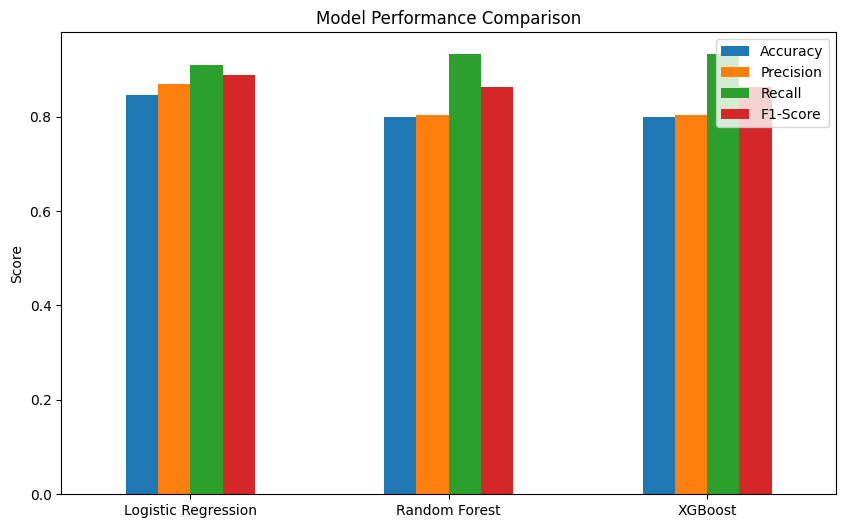

In [80]:
# Convert results to a DataFrame for comparison
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
print(results_df)

# Plot comparison of metrics
results_df.plot(kind='bar', figsize=(10, 6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.show()

Visualize Results 

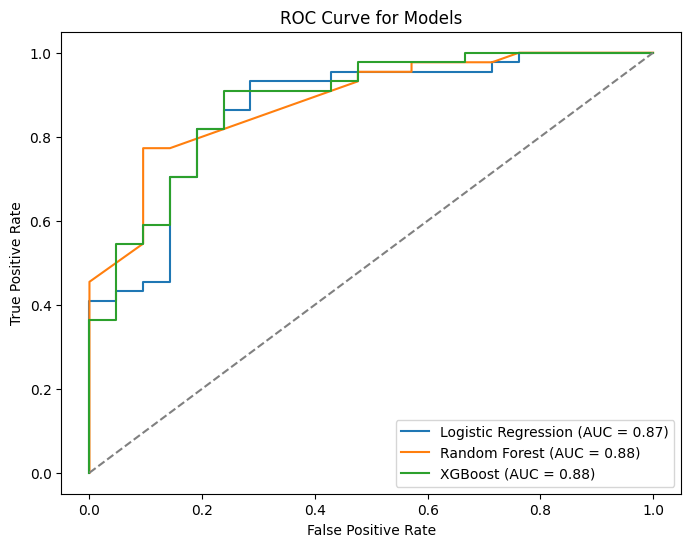

In [81]:
# Plot ROC curves for each model
from sklearn.metrics import roc_curve, roc_auc_score

plt.figure(figsize=(8, 6))
for name, model in models.items():
    if name == "Logistic Regression":
        model = grid_log_reg.best_estimator_
    elif name == "Random Forest":
        model = grid_rf.best_estimator_
    elif name == "XGBoost":
        model = grid_xgb.best_estimator_
    
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve for Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

Voting Classifier 

In [82]:
from sklearn.ensemble import VotingClassifier

# Initialize the individual models with their best hyperparameters
log_reg = grid_log_reg.best_estimator_
rf = grid_rf.best_estimator_
xgb = grid_xgb.best_estimator_

# Create the Voting Classifier
voting_clf = VotingClassifier(
    estimators=[
        ('log_reg', log_reg),
        ('rf', rf),
        ('xgb', xgb)
    ],
    voting='soft'  # Use soft voting to average probabilities
)

# Train the Voting Classifier
voting_clf.fit(X_train, y_train)

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('log_reg',
                              LogisticRegression(C=1, random_state=42)),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metri...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=200, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))],
                 voting='soft')

Evaluate and Compare Performance


Model Performance Comparison (Including Voting Classifier):

Logistic Regression Metrics:
Accuracy: 0.8462
Precision: 0.8696
Recall: 0.9091
F1-Score: 0.8889

Random Forest Metrics:
Accuracy: 0.8000
Precision: 0.8039
Recall: 0.9318
F1-Score: 0.8632

XGBoost Metrics:
Accuracy: 0.8000
Precision: 0.8039
Recall: 0.9318
F1-Score: 0.8632

Voting Classifier Metrics:
Accuracy: 0.8000
Precision: 0.8039
Recall: 0.9318
F1-Score: 0.8632


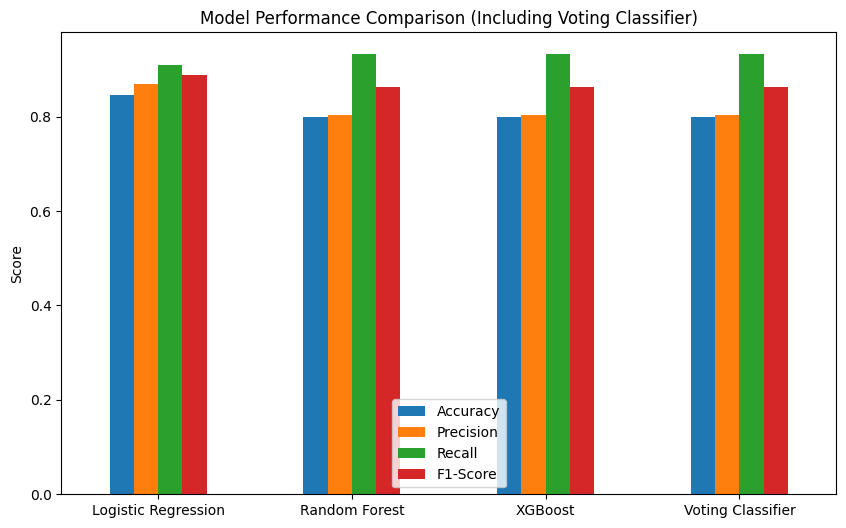

In [83]:
# Evaluate the Voting Classifier
y_pred_voting = voting_clf.predict(X_test)
accuracy_voting = accuracy_score(y_test, y_pred_voting)
precision_voting = precision_score(y_test, y_pred_voting)
recall_voting = recall_score(y_test, y_pred_voting)
f1_voting = f1_score(y_test, y_pred_voting)

# Add Voting Classifier results to the results dictionary
results["Voting Classifier"] = {
    "Accuracy": accuracy_voting,
    "Precision": precision_voting,
    "Recall": recall_voting,
    "F1-Score": f1_voting
}

# Display results for all models, including the Voting Classifier
print("\nModel Performance Comparison (Including Voting Classifier):")
for model_name, metrics in results.items():
    print(f"\n{model_name} Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

# Plot comparison of metrics
results_df = pd.DataFrame(results).T
results_df.plot(kind='bar', figsize=(10, 6))
plt.title("Model Performance Comparison (Including Voting Classifier)")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.show()

Confusion Matrix for Voting Classifier

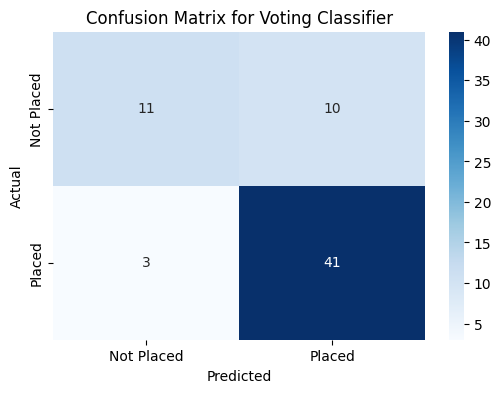

In [84]:
# Confusion matrix for the Voting Classifier
cm_voting = confusion_matrix(y_test, y_pred_voting)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_voting, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Placed', 'Placed'], yticklabels=['Not Placed', 'Placed'])
plt.title("Confusion Matrix for Voting Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

ROC Curve for Voting Classifier


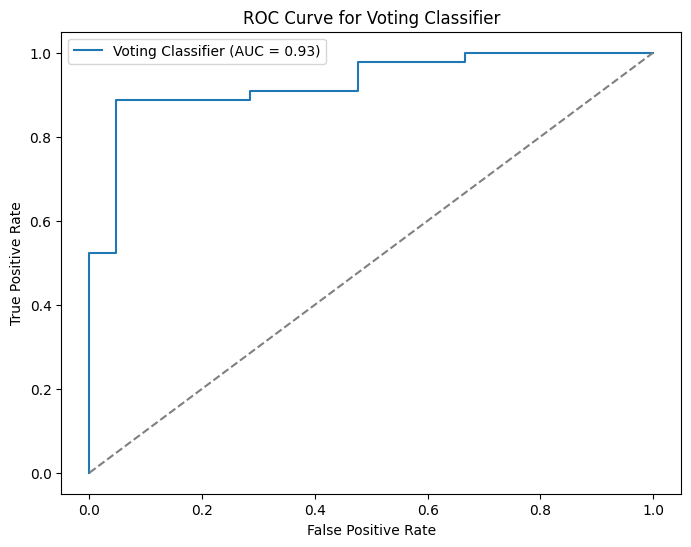

In [85]:
# ROC curve for the Voting Classifier
y_pred_proba_voting = voting_clf.predict_proba(X_test)[:, 1]
fpr_voting, tpr_voting, _ = roc_curve(y_test, y_pred_proba_voting)
auc_voting = roc_auc_score(y_test, y_pred_proba_voting)

plt.figure(figsize=(8, 6))
plt.plot(fpr_voting, tpr_voting, label=f"Voting Classifier (AUC = {auc_voting:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve for Voting Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

Save the Feature Names Used During Training

In [86]:

# Save the feature names
feature_names = X_train.columns.tolist()
joblib.dump(feature_names, 'feature_names.pkl')

['feature_names.pkl']

Save Model to local

In [87]:
import joblib

# Save the Voting Classifier model
joblib.dump(voting_clf, 'voting_classifier.pkl')

['voting_classifier.pkl']